<img src="https://d1vwxdpzbgdqj.cloudfront.net/s3-public-images/learning-partners/greatlearning-brand.png" style="float:right;" width=25%></img>

### The following is the description of the dataset that we are going to use for Two Way ANOVA.


<img src="https://albertapressleader.ca/wp-content/uploads/2020/12/kidney-dialysis.jpg" width = 45%></img>

### Problem Statement:

### The dose for effective dialysis depends on duration of treatment and weight gain between treatments. To study the effects of these two factors on the number of days hospitalized attributable to kidney failure, a random sample of 10 patients per group undergone treatment in a large dialysis facility was obtained. Treatment duration was at 3 levels: short, mid and long. Average weight gain between treatments during the year was categorized into three levels: mild, moderate and severe.


### Quick Summary:

a) Dose of effective Dialysis <== (Duration of Treatment) AND (Weight Gain Between Treatment)

b) No. of Days Hopitalized 

c) Attributable to Kindney Failure

d) Random Sample of 10 Patients per Group

e) Treatment Duration --> Short, Mid, Long

f) Weight Gain Levels --> Mild, Moderate, Severe



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
df = pd.read_csv('Dialysis.csv')

In [23]:
df

,Duration,Weight_Gain,Patient,Days
0,1,1,1,3
1,1,1,2,3
2,1,1,3,14
3,1,1,4,16
4,1,1,5,3
...,...,...,...,...
85,3,3,6,19
86,3,3,7,19
87,3,3,8,20
88,3,3,9,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Duration     90 non-null     int64
 1   Weight_Gain  90 non-null     int64
 2   Patient      90 non-null     int64
 3   Days         90 non-null     int64
dtypes: int64(4)
memory usage: 2.9 KB


In [5]:
df['Weight_Gain']= pd.Categorical(df['Weight_Gain'])
df['Duration']= pd.Categorical(df['Duration'])
df['Patient']= pd.Categorical(df['Patient'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Duration     90 non-null     category
 1   Weight_Gain  90 non-null     category
 2   Patient      90 non-null     category
 3   Days         90 non-null     int64   
dtypes: category(3), int64(1)
memory usage: 1.7 KB


In [7]:
df

,Duration,Weight_Gain,Patient,Days
0,1,1,1,3
1,1,1,2,3
2,1,1,3,14
3,1,1,4,16
4,1,1,5,3
...,...,...,...,...
85,3,3,6,19
86,3,3,7,19
87,3,3,8,20
88,3,3,9,11


Duration and Weight Gain are categorical variables with its own classes / levels.

For each sample (row item), we have a Duration and against with days of hospitalization 
For each sample (row item), we have a Weight Gain and against with days of hospitalization 

Each of these dataset constitutes its on data series, which may or may not follow the "fitness" or "normality". 

As ANOVA presumes that that the data set follows normality, we need to test the Normality for these data series to start with.

In [8]:
# include the scipy library
from scipy import stats

"Test the Normality" of the data or the "Test of Fit" to check whether the values are normally distributed.

Following are the 3 generally used Tests for Normality:

      1) Anderson-Darling Test (AD)
      2) Shapiro-Wilks Test (SW)
      3) Skewness-Kurtosis All Test  (SK All)

We will use the Shapiro-Wilk Test to Test the Normality of the Data.

Shapiro-Wilks Test rejects the hypothesis of normality when the p-value is less than or equal to 0.05 (alpha = 0.05) 
Failing the normality test allows to state with 95% confidence the data does not fit the normal distribution.  
Passing the normality test only allows to state no significant departure from normality was found.

Hypothesis

H0 = The population is normally distributed

H1 = The population is NOT normally distributed

In [24]:
# Extract Data Series 

duration_1 = df[df['Duration']==1]['Days']
duration_2 = df[df['Duration']==2]['Days']
duration_3 = df[df['Duration']==3]['Days']

Weight_Gain_1 = df[df['Weight_Gain']==1]['Days']
Weight_Gain_2 = df[df['Weight_Gain']==2]['Days']
Weight_Gain_3 = df[df['Weight_Gain']==3]['Days']

In [10]:
# Perfrom Shapiro-Wilks Test on Duration

# Syntax ==>      stats.shapiro(data_series)

print(stats.shapiro([duration_1]))
print(stats.shapiro([duration_2]))
print(stats.shapiro([duration_3]))

ShapiroResult(statistic=0.8940047025680542, pvalue=0.006010832265019417)
ShapiroResult(statistic=0.9489384889602661, pvalue=0.15833470225334167)
ShapiroResult(statistic=0.9332407712936401, pvalue=0.05990174040198326)


In [11]:
# Shapiro-Wilks Test on Duration - Described

stat, p = stats.shapiro([duration_1])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("duration_1: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("duration_1: Data does not follow Normal Distribution (reject H0)\n")

stat, p = stats.shapiro([duration_2])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("duration_2: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("duration_2: Data does not follow Normal Distribution (reject H0)\n")

stat, p = stats.shapiro([duration_3])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("duration_3: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("duration_3: Data does not follow Normal Distribution (reject H0)\n")


stat=0.89400, p=0.00601
duration_1: Data does not follow Normal Distribution (reject H0)

stat=0.94894, p=0.15833
duration_2: Data follows Normal Distribution (fail to reject H0)

stat=0.93324, p=0.05990
duration_3: Data follows Normal Distribution (fail to reject H0)



In [12]:
# Perfrom Shapiro-Wilks Test on Weight Gain

stat, p = stats.shapiro([Weight_Gain_1])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("Weight_Gain_1: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("Weight_Gain_1: Data does not follow Normal Distribution (reject H0)\n")
    
    
stat, p = stats.shapiro([Weight_Gain_2])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("Weight_Gain_2: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("Weight_Gain_2: Data does not follow Normal Distribution (reject H0)\n")
    
stat, p = stats.shapiro([Weight_Gain_3])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("Weight_Gain_3: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("Weight_Gain_3: Data does not follow Normal Distribution (reject H0)\n")

stat=0.90532, p=0.01136
Weight_Gain_1: Data does not follow Normal Distribution (reject H0)

stat=0.96673, p=0.45400
Weight_Gain_2: Data follows Normal Distribution (fail to reject H0)

stat=0.91483, p=0.01974
Weight_Gain_3: Data does not follow Normal Distribution (reject H0)



In [13]:
# If Shapiro Test fails - Test the normality with another method  
# Anderson Darling Test 

# Returns:
#            statistic: The Anderson-Darling test statistic
#      critical_values: A list of critical values for this distribution
#   significance_level: A list of significance levels for the corresponding critical values in percents

print(stats.anderson(duration_1,dist='norm'))
print(stats.anderson(duration_2,dist='norm'))
print(stats.anderson(duration_3,dist='norm'))

AndersonResult(statistic=1.1678600124904968, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.48634982313612696, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.541924988816092, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [14]:
# Anderson Darling Test - Explained for duration_1

result = stats.anderson(duration_1,dist='norm')
print('Statistic: %.5f' % result.statistic)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.5f: %.5f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.5f: %.5f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 1.16786
15.00000: 0.52100, data does not look normal (reject H0)
10.00000: 0.59300, data does not look normal (reject H0)
5.00000: 0.71200, data does not look normal (reject H0)
2.50000: 0.83000, data does not look normal (reject H0)
1.00000: 0.98800, data does not look normal (reject H0)


### Homogeneity Test 

The homogeneity Test  is a statistical test method, that checks if two (or more) datasets come from the same distribution or not.

#### The Leven Test  
Levene’s Test is used to determine whether two or more groups have equal variances. It is commonly used because many statistical tests make the assumption that groups have equal variances and Levene’s Test allows to determine if this assumption is satisified.


In [15]:
#Homogeniety:  The Levene Test 
#              tests the null hypothesis that all input samples are from populations with equal variances.
#              alpha = 0.05

print(stats.levene(duration_1,duration_2,duration_3))

stat, p = stats.levene(duration_1,duration_2,duration_3)

print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("DURATION: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("DURATION: Data does not follow Normal Distribution (reject H0)\n")
    
    
print()
print(stats.levene(Weight_Gain_1,Weight_Gain_2,Weight_Gain_3))
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print("WEIGHT_GAIN: Data follows Normal Distribution (fail to reject H0)\n")
else:
    print("WEIGHT_GAIN: Data does not follow Normal Distribution (reject H0)\n")
    

LeveneResult(statistic=0.513934349574488, pvalue=0.5999421217786557)
stat=0.51393, p=0.59994
DURATION: Data follows Normal Distribution (fail to reject H0)


LeveneResult(statistic=1.3856337425064233, pvalue=0.25563037501060487)
stat=0.51393, p=0.59994
WEIGHT_GAIN: Data follows Normal Distribution (fail to reject H0)



## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: The mean number of days of hospital stay is the same at 3 levels of treatment Weight_Gain
## $H_a$: For at least one level of treatment Weight_Gain, mean number of days of hospital stay is different


**Now, let us go ahead and perform one way ANOVA with 'Weight Gain' with respect to 'Days'.**

In [16]:
formula = 'Days ~ C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.108508,0.897293
Residual,87.0,2734.966667,31.436398,NaN,NaN


**Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we $\textbf{fail to reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).**

**Let us now perform One Way ANOVA with the variable 'Duration' with respect to 'Days'.**

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: The mean number of days of hospital stay is the same at 3 levels of treatment Duration
## $H_a$: For at least one level of treatment Duration, mean number of days of hospital stay is different


In [17]:
df['Duration']= pd.Categorical(df['Duration'])

In [18]:
formula = 'Days ~ C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Duration),2.0,326.955556,163.477778,5.889668,0.003991
Residual,87.0,2414.833333,27.756705,NaN,NaN


**Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).**

**Let us now perform the Two Way ANOVA. We will now analyse the effect of both the treatments on the 'Days' variable.**

In [19]:
formula = 'Days ~ C(Weight_Gain) + C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.120408,0.886709
C(Duration),2.0,326.955556,163.477778,5.770576,0.004467
Residual,85.0,2408.011111,28.329542,NaN,NaN


**The p-value in the one of the treatments is greater than $\alpha$(0.05)**

**Let us check whether there is any interaction effect between the treatments.**

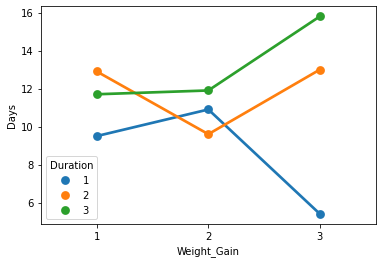

In [20]:
sns.pointplot(x='Weight_Gain', y='Days', data=df, hue='Duration',ci=None);

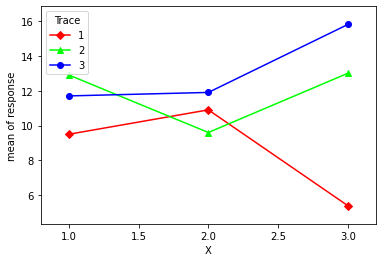

In [21]:
#Method 2 of drawing an interaction plot

from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df['Weight_Gain']),np.array(df['Duration']),np.array(df['Days']),markers=['D','^','o']);

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

In [22]:
formula = 'Days ~ C(Weight_Gain) + C(Duration) + C(Weight_Gain):C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,6.822222,3.411111,0.133498,0.875222
C(Duration),2.0,326.955556,163.477778,6.397884,0.002632
C(Weight_Gain):C(Duration),4.0,338.311111,84.577778,3.310045,0.014538
Residual,81.0,2069.700000,25.551852,NaN,NaN


**Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'Weight_Gain' and 'Duration' suggests that the Null Hypothesis is rejected in this case.**

                                                                         ------ Happy Learning------